In [1]:
import torchphysics as tp

T = tp.spaces.R1("t")
U = tp.spaces.R1("u")

Fn_space = tp.spaces.FunctionSpace(T, U)
domain = tp.domains.Interval(T, 0, 5)

grid = tp.samplers.GridSampler(domain, 100).sample_points().unsqueeze(0)

harmoinc_fns = tp.domains.HarmonicFunctionSet1D(Fn_space, domain, 5)
rand_fns = harmoinc_fns.sample_functions(10, grid).as_tensor

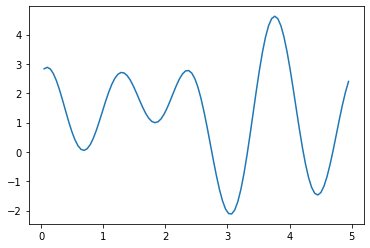

In [2]:
import matplotlib.pyplot as plt
draw_idx = 1
plt.plot(grid.as_tensor[0], rand_fns[draw_idx])

0.001949317738791423 1.0
0.001949317738791423


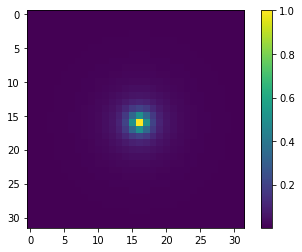

In [29]:
from itertools import product
import numpy as np
import matplotlib.pyplot as plt

resolution = (32, 32)
R = np.zeros(resolution)
helper = lambda x : 1/(1 + sum([i**2 for i in x]))**1
for x in product(*(range(-r//2, r//2) for r in resolution)):
    y = [x[i] + resolution[i]//2 for i in range(len(x))]
    #print(y, x)
    R[tuple(y)] = helper(x)

print(np.min(R), np.max(R))
print(R[tuple([0, 0])])
plt.imshow(R)
plt.colorbar()

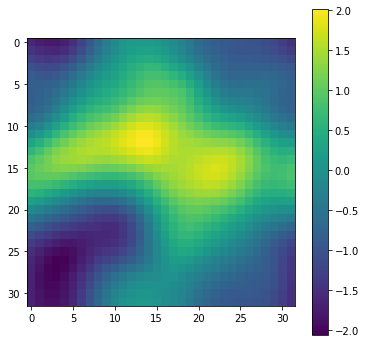

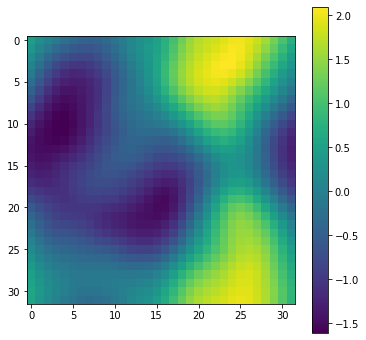

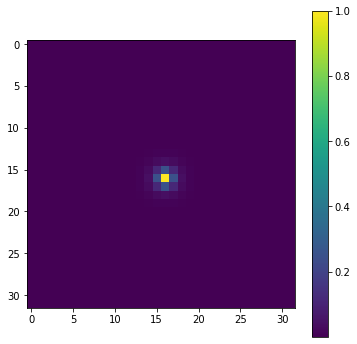

In [9]:
import torch
import matplotlib.pyplot as plt
import numpy as np
size = 32
cov = 1
outer_exponent = 2
inner_exponent = 2
#def rho(x,y):
#    return np.exp(-1/(2*cov) * (x**2 + y**2))

def rho(x, y):
    return 1/(1.0 + x**inner_exponent + y**inner_exponent)**outer_exponent
W = torch.randn((2, size, size))
F_W = torch.fft.fftshift(torch.fft.fft2(W))

R = torch.zeros((size, size))
for i in range(size):
    for j in range(size):
        R[i, j] = rho((i - size/2.0), (j - size/2.0))

B = R * F_W
G = torch.fft.ifft2(torch.fft.ifftshift(B, dim=[1, 2])).real

mean_G = torch.mean(G, dim=[1, 2], keepdim=True)
G -= mean_G
std_G = torch.std(G, dim=[1, 2], keepdim=True)
G /= std_G
plt.figure(0, figsize=(6, 6))
plt.imshow(G[0])
plt.colorbar()

plt.figure(1, figsize=(6, 6))
plt.imshow(G[1])
plt.colorbar()

plt.figure(2, figsize=(6, 6))
plt.imshow(R)
plt.colorbar()

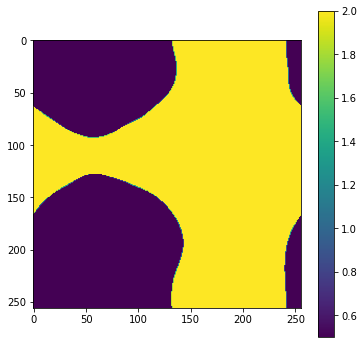

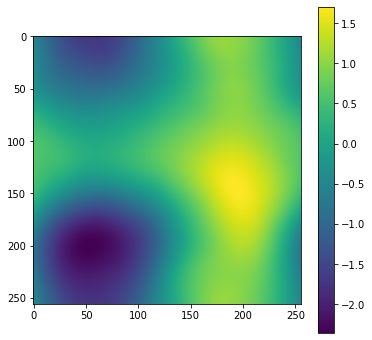

In [19]:
import torchphysics as tp 
import torch
import matplotlib.pyplot as plt

X = tp.spaces.R2("x")
U = tp.spaces.R1("u")

fn_space = tp.spaces.FunctionSpace(X, U)

grf_set = tp.domains.GRFFunctionSet(fn_space, (256, 256))

loc = tp.spaces.Points(torch.ones((10,2)), X)

grf_images = grf_set.sample_functions(20, loc).as_tensor

plt.figure(0, figsize=(6, 6))
plt.imshow(0.5 + 1.5*torch.heaviside(grf_images[0], torch.tensor(0.0)))
plt.colorbar()

plt.figure(1, figsize=(6, 6))
plt.imshow(grf_images[0])
plt.colorbar()

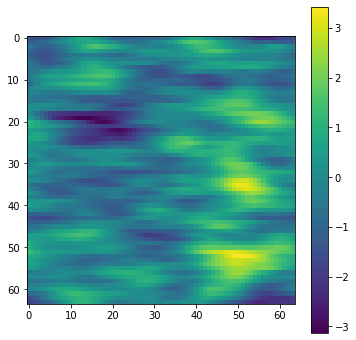

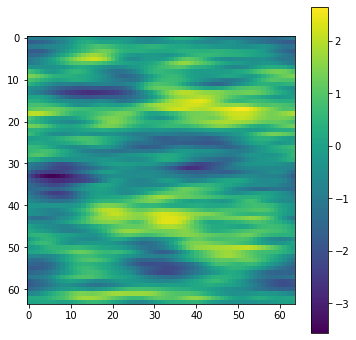

In [9]:
import torchphysics as tp 
import torch
import matplotlib.pyplot as plt

X = tp.spaces.R2("x")
U = tp.spaces.R1("u")

fn_space = tp.spaces.FunctionSpace(X, U)

def conv_fn(x):
    return 1/(1.0 + 0.15*abs(x[0]) + 0.15*abs(x[1])**2)**2

grf_set = tp.domains.GRFFunctionSet(fn_space, (64, 64), auto_cov_fn=conv_fn)

loc = tp.spaces.Points(torch.ones((10,2)), X)

grf_images = grf_set.sample_functions(20, loc).as_tensor

plt.figure(0, figsize=(6, 6))
plt.imshow(grf_images[0])
plt.colorbar()

plt.figure(1, figsize=(6, 6))
plt.imshow(grf_images[1])
plt.colorbar()

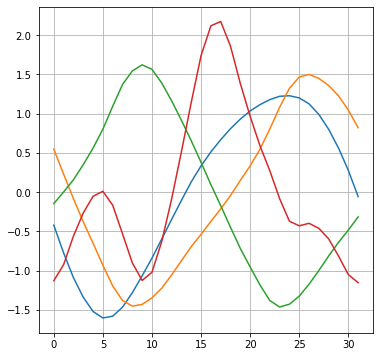

In [37]:
import torchphysics as tp 
import torch
import matplotlib.pyplot as plt

X = tp.spaces.R1("x")
U = tp.spaces.R1("u")

fn_space = tp.spaces.FunctionSpace(X, U)


def cov_fn(x):
    return 1/(0.1 + abs(x[0])**6)**0.5

grf_set = tp.domains.GRFFunctionSet(fn_space, (32, ), auto_cov_fn=cov_fn)

loc = tp.spaces.Points(torch.ones((10,1)), X)

grf_images = grf_set.sample_functions(20, loc).as_tensor

plt.figure(0, figsize=(6, 6))
plt.plot(grf_images[0])
plt.plot(grf_images[2])
plt.plot(grf_images[3])
plt.plot(grf_images[4])
plt.grid()
